In [7]:
import numpy as np
from adaline import adaline
from pandas import DataFrame
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## Testing adaline for simple liniar sepration

given a value from R^2, (x, y), is y > 1 ?

In [18]:
train_data = np.random.uniform(-100, 100, (1000, 2))
train_label = train_data[:,1] > 1

DataFrame([train_data[:,0], train_data[:,1], train_label]).T.rename(columns = {0: 'x', 1:'y', 2: 'target'})

,x,y,target
0,98.2097,-94.3066,False
1,19.0552,-24.2451,False
2,49.0772,61.8197,True
3,-54.4834,81.4051,True
4,17.772,-36.5783,False
...,...,...,...
995,-47.2734,-99.2629,False
996,-99.2748,-24.42,False
997,-98.9889,58.0343,True
998,13.9707,54.4923,True


In [19]:
neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

neuron.weights

array([14.10071122, 39.78177485])

In [20]:
pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5
pred

metrics.accuracy_score(train_label, pred)

0.915

In [21]:
test_data =  np.random.uniform(-100, 100, (1000, 2))
test_label = test_data[:,1] > 1

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.913

In [22]:
# preforms just as well on new data, perhaps a tiny bit worse

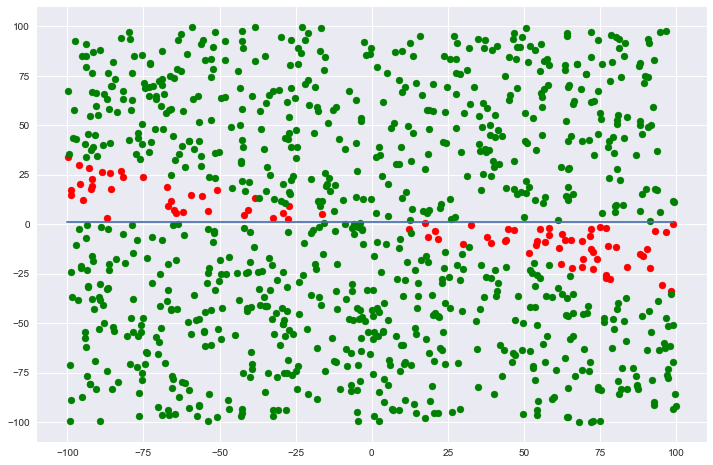

In [23]:
mistakes = test_data[np.where((test_label == pred) == False)]
success = test_data[np.where((test_label == pred) == True)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.plot(list(range(-100, 100)) , np.ones(200))
plt.show()

In [24]:
# the angle/slope is a bit off

In [25]:
#does more data help?

train_data = np.random.uniform(-100, 100, (30000, 2)) # 30 times as many dots as before
train_label = train_data[:,1] > 1

neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.992

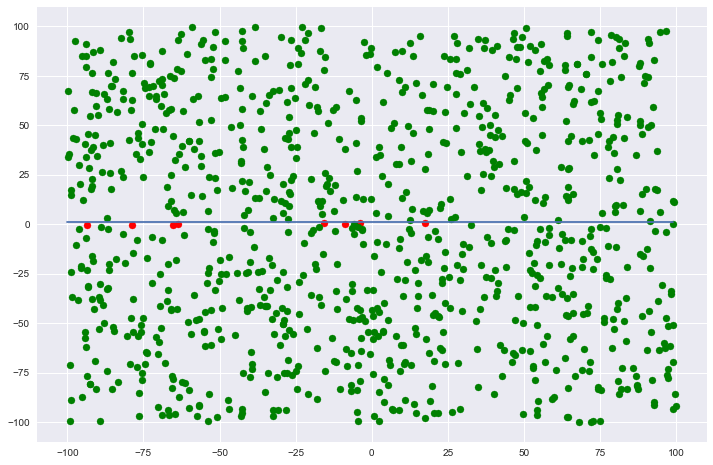

In [26]:
#seems like it

mistakes = test_data[np.where((test_label == pred) == False)]
success = test_data[np.where((test_label == pred) == True)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.plot(list(range(-100, 100)) , np.ones(200))
plt.show()

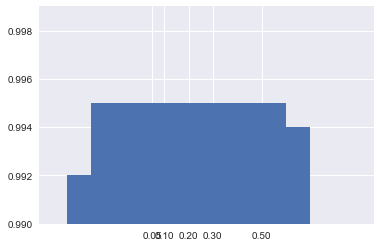

In [39]:
#what about different learning rates

scores = []

rates = [0.05, 0.1, 0.2, 0.3, 0.5]

for rate in rates:

    neuron = adaline(2, rate)

    history = neuron.train(train_data, train_label)

    pred = np.array([neuron.predict(i) for i in test_data])
    pred = pred >= 0.5

    scores.append(metrics.accuracy_score(test_label, pred))


plt.bar(rates, scores)
plt.xticks(rates)
plt.ylim([0.99,0.999])
plt.show()

In [40]:
#looks like somewhere in the middle is more relable

## Testing adaline for a more challenging task

given a value from R^2, (x, y).
does it setesfy: 4 <= x^2 + y^2 <= 9 ?

this equation describe a ring with raduises 2 and 3

In [42]:
# I'll have to decrease the posiable range of values to balance the data-set

train_data = np.random.uniform(-8, 8, (1000, 2))

small_circle = 4 <= train_data[:,0]**2 + train_data[:,1]**2
big_circle = train_data[:,0]**2 + train_data[:,1]**2 <= 9

train_label = small_circle & big_circle

DataFrame([train_data[:,0], train_data[:,1], train_label]).T.rename(columns = {0: 'x', 1:'y', 2: 'target'})

,x,y,target
0,-7.51058,0.420751,False
1,4.67876,-3.28768,False
2,-7.34297,-1.04284,False
3,-0.986551,-6.43133,False
4,-6.47138,-1.42754,False
...,...,...,...
995,5.53653,7.12847,False
996,1.1292,2.02695,True
997,-1.69235,1.24453,True
998,-2.2125,7.42217,False


In [43]:
neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

neuron.weights

array([-0.83227851,  0.07518511])

In [44]:
pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5
pred

metrics.accuracy_score(train_label, pred)

0.491

In [45]:
# preforms poorly but is to be excpected since
# 1-neuron model can only learn linarly seprable
# classification problomes
# in fact its predictions are in part with simply geussing (around 0.5 correct predictions)


In [46]:
train_data = np.random.uniform(-100, 100, (30000, 2)) # 30 times as many dots as before

circle_small = 81 <= train_data[:,0]**2 + train_data[:,1]**2
circle_big = train_data[:,0]**2 + train_data[:,1]**2 <= 900

train_label = circle_small & circle_big

neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

pred = np.array([neuron.predict(j) for j in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.336

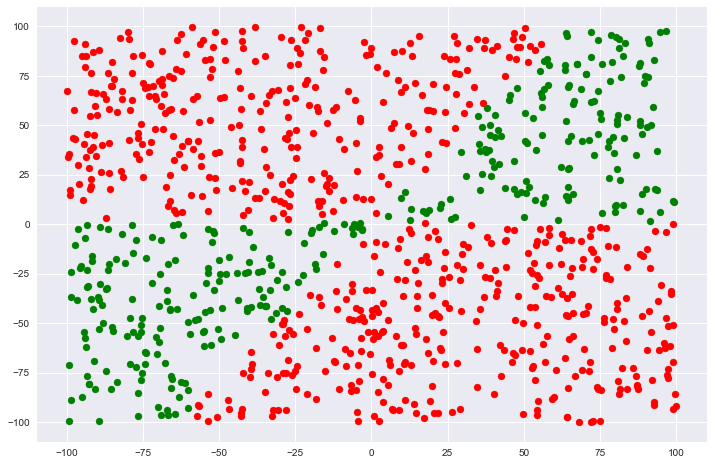

In [47]:
mistakes = test_data[np.where((test_label == pred) == False)]
success = test_data[np.where((test_label == pred) == True)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.show()

In [138]:
# we can see very clearly that the adaline tried to find A LINIAR inequalty
# to classefy the instances by which